In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN , KMeans 
import math
import graphviz
!pip install kmodes
from kmodes.kmodes import KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path="/content/drive/MyDrive/SISTEMAS INTELIGENTES/Datasets/nypd_DANGER.csv"
NYPD = pd.read_csv(path)
ny=NYPD.copy()
bor="/content/drive/MyDrive/SISTEMAS INTELIGENTES/Datasets/nypd_boro.csv"
BORO = pd.read_csv(bor)
des="/content/drive/MyDrive/SISTEMAS INTELIGENTES/Datasets/nypd_decision.csv"
DESI = pd.read_csv(des)

In [ ]:
BORO=BORO.replace(to_replace=["BROOKLYN","MANHATTAN","BRONX","QUEENS","STATEN ISLAND"],value=["2","1","4","3","5"])
BORO["borough"].value_counts()

2    104453
1     85738
4     79085
3     70265
5     16345
Name: borough, dtype: int64

In [ ]:
NYPD["danger"].value_counts()

2    195373
3    109852
1     50661
Name: danger, dtype: int64

In [ ]:
kmeans = KMeans(n_clusters=4)
nyclusters = kmeans.fit(NYPD)
NYPD["Cluster"] = kmeans.fit_predict(NYPD)
NYPD["Cluster"] = NYPD["Cluster"].astype("category")
dangerlevel = kmeans.labels_[3]

kmeanSs = KMeans(n_clusters=5)
BORO["Cluster"] = kmeanSs.fit_predict(BORO)
BORO["Cluster"] = BORO["Cluster"].astype("category")
BoroZone = kmeanSs.labels_[5]
BORO

,borough,latitude,longitude,Cluster
0,4,40.837376,-73.887761,0
1,2,40.661205,-73.950687,1
2,4,40.816872,-73.850685,0
3,3,40.696177,-73.804492,3
4,3,40.741458,-73.884339,3
...,...,...,...,...
355881,1,40.825818,-73.948975,2
355882,4,40.820315,-73.890825,0
355883,3,40.754199,-73.832963,3
355884,4,40.883777,-73.907837,0


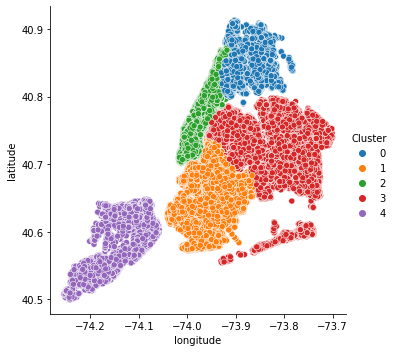

In [ ]:
sns.relplot(x="longitude", y="latitude", hue="Cluster", data=BORO, height=5,);

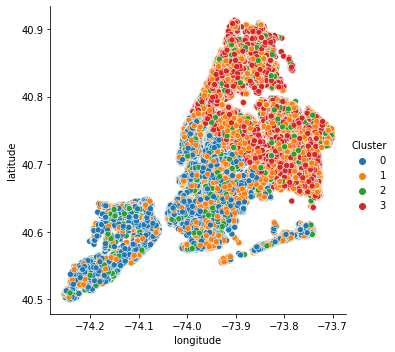

In [ ]:
sns.relplot(x="longitude", y="latitude", hue="Cluster", data=NYPD, height=5,);

In [ ]:
DESI.head()

,description,danger,jurisdiction,borough,type
0,"WEAPONS, POSSESSION",MISDEMEANOR,N.Y. TRANSIT POLICE,BRONX,TRANSIT - NYC SUBWAY
1,ASSAULT 3,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,STREET
2,"MARIJUANA, POSSESSION 4 & 5",MISDEMEANOR,N.Y. HOUSING POLICE,BRONX,RESIDENCE - PUBLIC HOUSING
3,WEAPONS POSSESSION 3,FELONY,N.Y. POLICE DEPT,QUEENS,STREET
4,"HARASSMENT,SUBD 1,CIVILIAN",VIOLATION,N.Y. POLICE DEPT,QUEENS,STREET


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1017850.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1017850.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1017850.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1017850.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1017850.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 30984, cost: 905122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 65638, cost: 899641.0
Run 2, iteration: 2/100, moves: 21575, cost: 899641.0
I

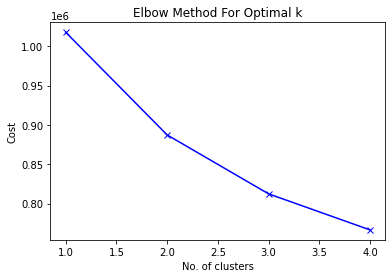

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(DESI)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(DESI)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 145089, cost: 810640.0
Run 1, iteration: 2/100, moves: 49324, cost: 810640.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 74985, cost: 831481.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 12786, cost: 841406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 50162, cost: 860260.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 23623, cost: 864749.0
Best run was number 1


array([0, 2, 0, ..., 1, 0, 1], dtype=uint16)

In [ ]:
DESI.insert(0, "Cluster", clusters, True)
DESI

,Cluster,description,danger,jurisdiction,borough,type
0,0,"WEAPONS, POSSESSION",MISDEMEANOR,N.Y. TRANSIT POLICE,BRONX,TRANSIT - NYC SUBWAY
1,2,ASSAULT 3,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,STREET
2,0,"MARIJUANA, POSSESSION 4 & 5",MISDEMEANOR,N.Y. HOUSING POLICE,BRONX,RESIDENCE - PUBLIC HOUSING
3,0,WEAPONS POSSESSION 3,FELONY,N.Y. POLICE DEPT,QUEENS,STREET
4,0,"HARASSMENT,SUBD 1,CIVILIAN",VIOLATION,N.Y. POLICE DEPT,QUEENS,STREET
...,...,...,...,...,...,...
354506,1,"ROBBERY,COMMERCIAL UNCLASSIFIED",FELONY,N.Y. POLICE DEPT,MANHATTAN,HOTEL/MOTEL
354507,0,"HARASSMENT,SUBD 3,4,5",VIOLATION,N.Y. TRANSIT POLICE,BRONX,TRANSIT - NYC SUBWAY
354508,1,"ASSAULT 2,1,UNCLASSIFIED",FELONY,N.Y. POLICE DEPT,QUEENS,BAR/NIGHT CLUB
354509,0,AGGRAVATED HARASSMENT 2,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,RESIDENCE - APT. HOUSE


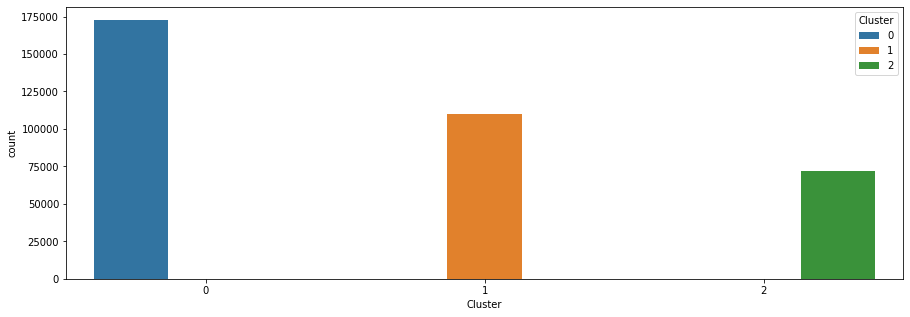

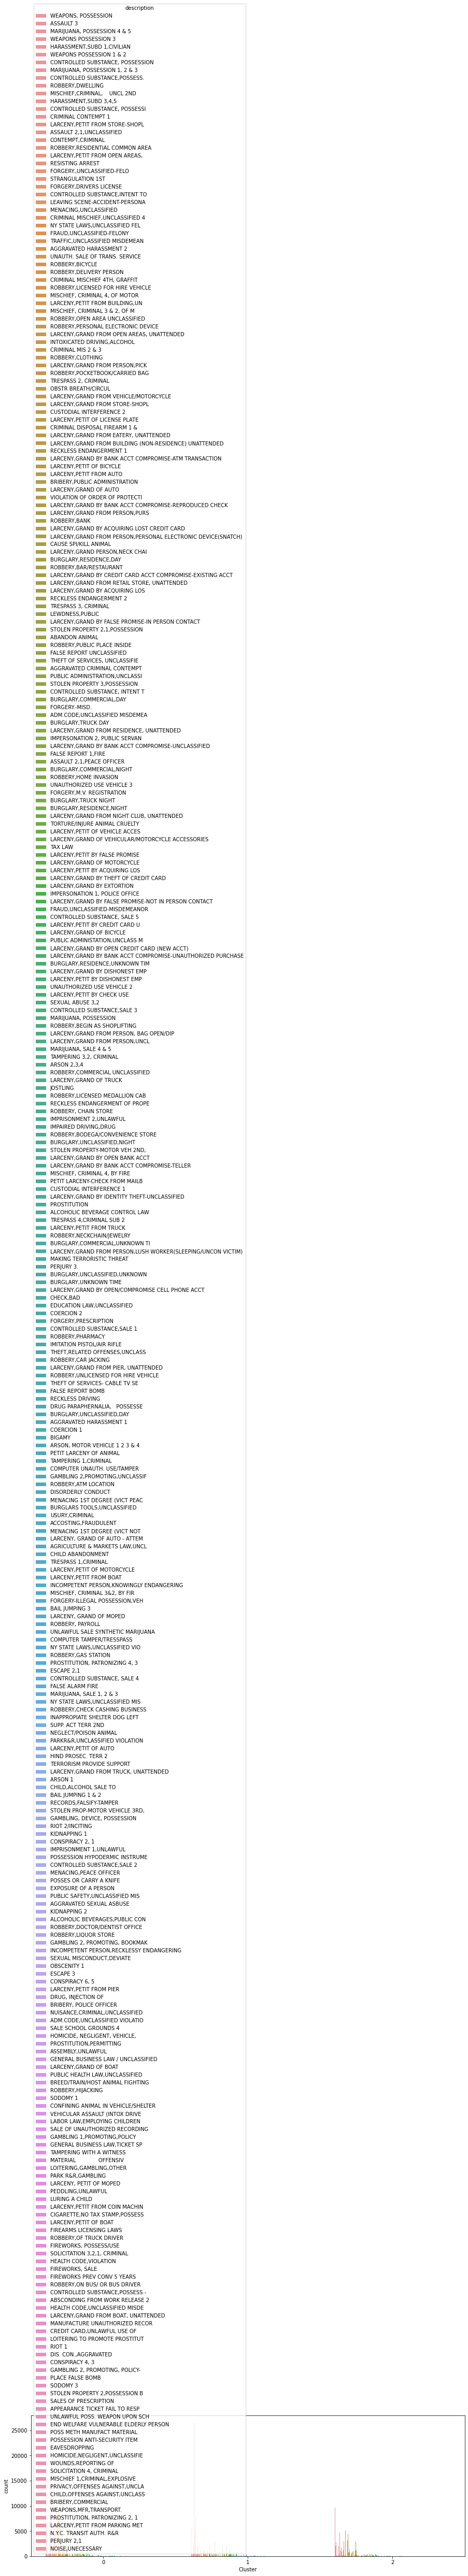

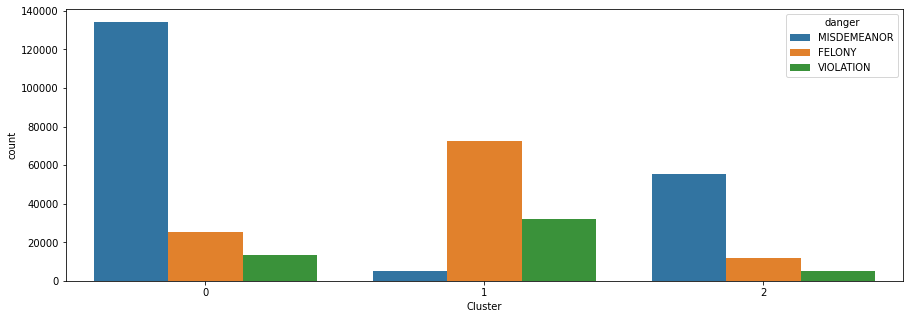

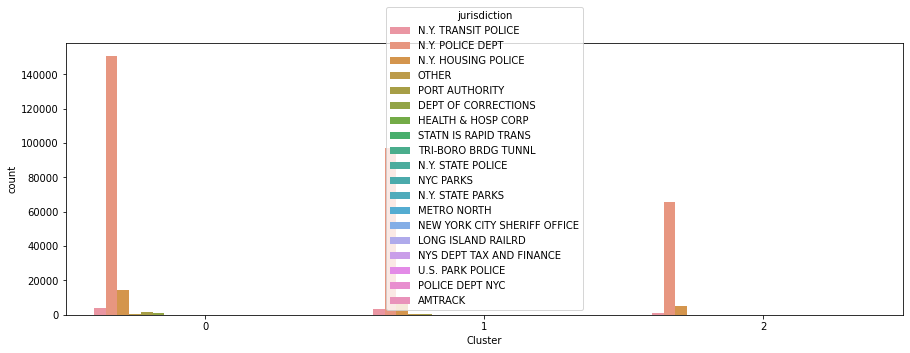

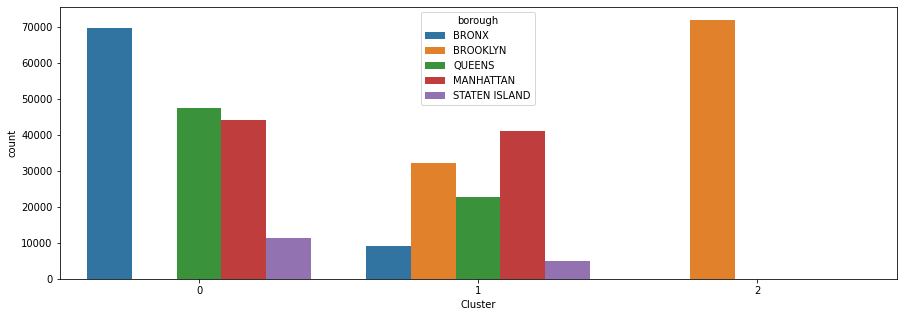

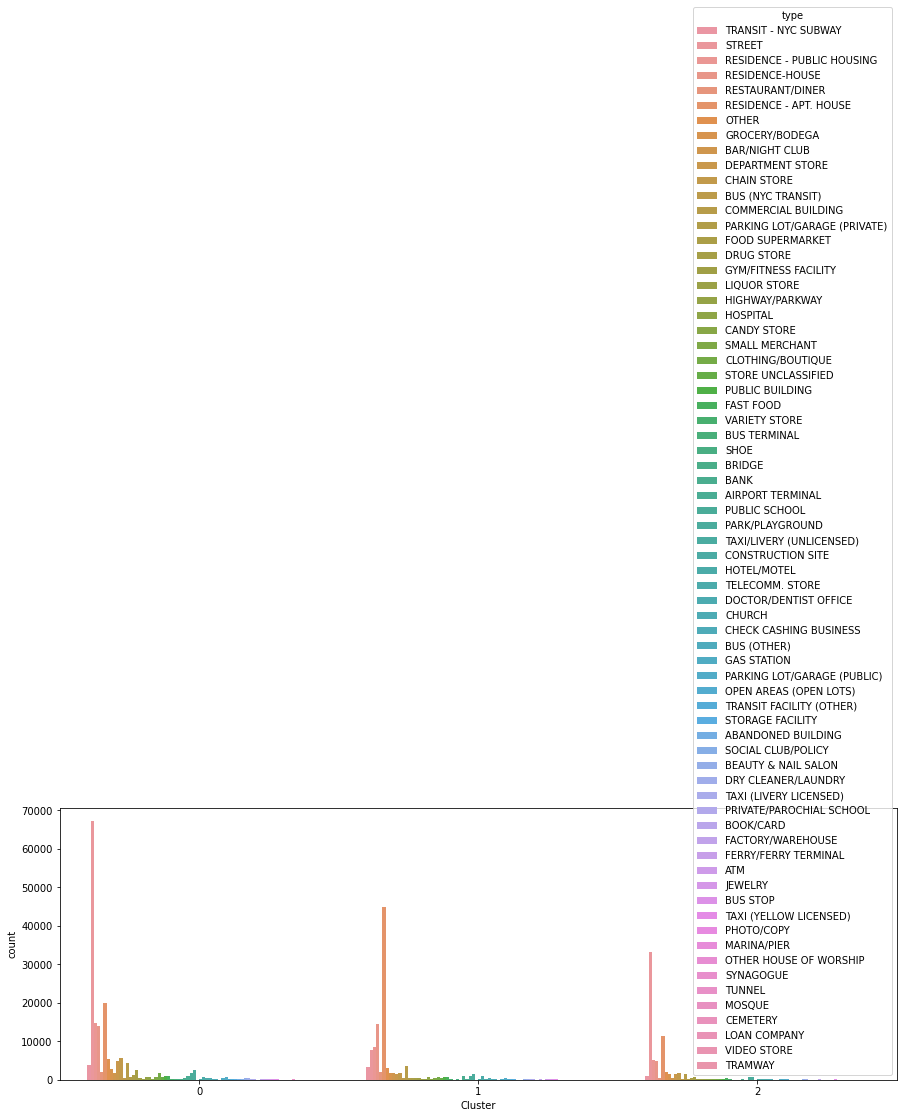

In [ ]:
for col in DESI:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = DESI)
    plt.show()